In [288]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import datetime as dt
import numpy as np
import pandas as pd
from pandas.api.types import CategoricalDtype
import seaborn as sns
from pandas.api.types import CategoricalDtype

# warnings
import warnings
warnings.filterwarnings('ignore',category=FutureWarning)

# Hide warning temporarily
pd.options.mode.chained_assignment = None

In [289]:
df = pd.read_csv("data/flights_sample_2m.csv")

In [290]:
df["FL_DATE"] = pd.to_datetime(df["FL_DATE"])
df["YEAR"] = df["FL_DATE"].dt.year
df["MONTH"] = df["FL_DATE"].dt.month

In [291]:
dow_category = CategoricalDtype(categories=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday",
                                            "Saturday", "Sunday"], ordered=True)

# 1. Phân tích mô tả (Descriptive Analysis)
## 1.1 Tổng quan

### Số chuyến bay mỗi năm (2019-2023)

In [323]:
flights_yearly = df.groupby("YEAR")["FL_DATE"].count().reset_index(name="Total_Flights")
flights_yearly

,YEAR,Total_Flights
0,2019,505345
1,2020,318768
2,2021,407824
3,2022,457760
4,2023,310303


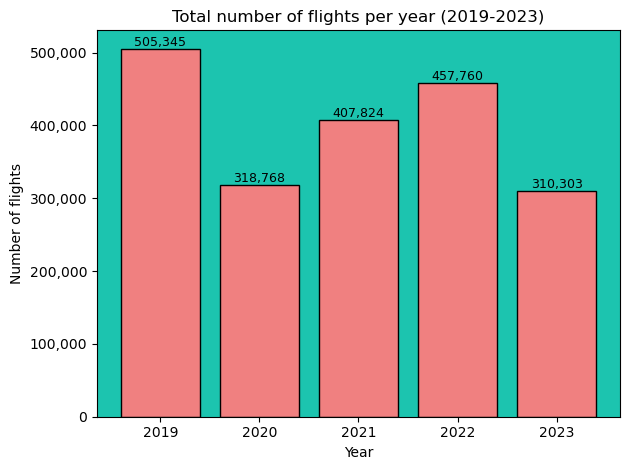

In [324]:
plt.bar(flights_yearly["YEAR"], flights_yearly["Total_Flights"], 
        color = "lightcoral", edgecolor="black")

# define a custom formatter function
def thousands_formatter(x, p):
    return format(int(x), ',')

# Apply the formatter to the y-axis
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(thousands_formatter))

plt.title("Total number of flights per year (2019-2023)")
plt.xlabel("Year")
plt.ylabel("Number of flights")

# Add numeric labels to columns
for i, val in enumerate(flights_yearly["Total_Flights"]):
    plt.text(flights_yearly["YEAR"].iloc[i], val, f"{val:,}", 
             ha="center", va="bottom", fontsize=9)

# Setting the background color of the plot
ax = plt.gca()
ax.set_facecolor("#1CC4AF")

#plt.grid()
plt.tight_layout()
plt.show()

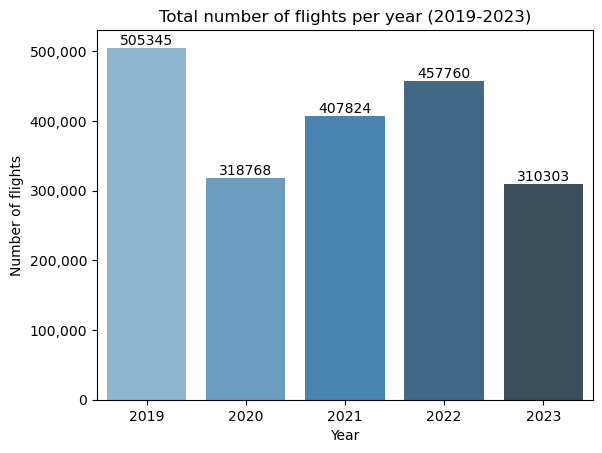

In [325]:
ax = sns.barplot(data = flights_yearly, 
                 x = "YEAR", y = "Total_Flights", 
                 palette="Blues_d")

# define a custom formatter function
def thousands_formatter(x, p):
    return format(int(x), ',')

# Apply the formatter to the y-axis
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(thousands_formatter))


plt.title("Total number of flights per year (2019-2023)")
plt.xlabel("Year")
plt.ylabel("Number of flights")

# Add labels by iterating through the bar patches
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2.,  # X-coordinate for text
            p.get_height(),                  # Y-coordinate for text (top of the bar)
            '%.0f' % p.get_height(),         # The label text (formatted height)
            fontsize=10,
            color='black',
            ha='center',                     # Horizontal alignment
            va='bottom')                     # Vertical alignment    
#plt.grid()
#plt.tight_layout()
plt.show()

### Mỗi tháng có bao nhiêu chuyến bay?

In [326]:
flights_monthly = df.groupby(["YEAR","MONTH"])["FL_DATE"].count().reset_index(name="Total_Flights")
flights_monthly

,YEAR,MONTH,Total_Flights
0,2019,1,39568
1,2019,2,35912
2,2019,3,43208
3,2019,4,41136
4,2019,5,43293
5,2019,6,43584
6,2019,7,44850
7,2019,8,45015
8,2019,9,41281
9,2019,10,43438


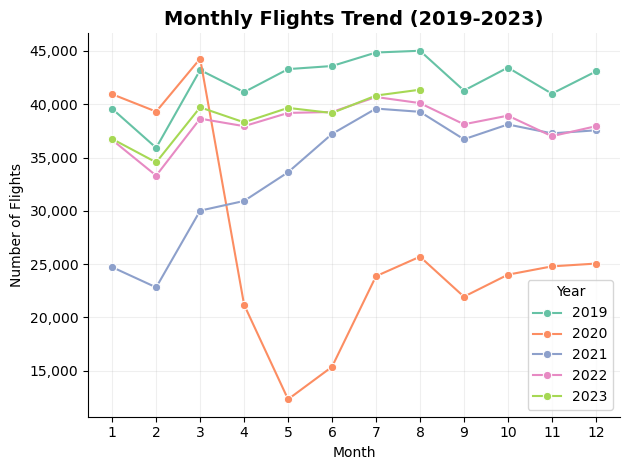

In [327]:
sns.lineplot(data = flights_monthly,
             x = "MONTH", y = "Total_Flights",
             hue = "YEAR", marker = "o", palette="Set2")

# define a custom formatter function
def thousands_formatter(x, p):
    return format(int(x), ',')

# Apply the formatter to the y-axis
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(thousands_formatter))

plt.title("Monthly Flights Trend (2019-2023)", fontsize=14, weight="bold")
plt.xlabel("Month")
plt.ylabel("Number of Flights")
plt.xticks(range(1,13))
plt.legend(title="Year")
plt.grid(alpha = 0.2)
sns.despine()
plt.tight_layout()
plt.show()

### Hãng hàng không nào có nhiều chuyến bay nhất mỗi năm?

In [328]:
# Tổng số chuyến bay theo năm và hãng
flights_airline_yearly = (
    df.groupby(["YEAR", "AIRLINE"])["FL_DATE"]
    .count()
    .reset_index(name="Total_Flights")
)

# Tổng toàn ngành mỗi năm
flights_industry_total = (
    flights_airline_yearly.groupby("YEAR")["Total_Flights"]
    .sum()
    .reset_index(name="Industry_Total")
)

# Merge vào bảng hãng
flights_airline_vs_industry = flights_airline_yearly.merge(flights_industry_total, on="YEAR")

In [298]:
# Tính % thay đổi so với năm trước (tốc độ phục hồi)
flights_airline_vs_industry["Growth_Rate"] = (
    flights_airline_vs_industry.groupby("AIRLINE")["Total_Flights"]
    .pct_change() * 100
)

flights_industry_total["Industry_Growth"] = (
    flights_industry_total["Industry_Total"].pct_change() * 100
)

In [299]:
# Lấy hãng top (ví dụ: top năm 2019)
airline_top = (
    flights_airline_vs_industry[flights_airline_yearly["YEAR"] == 2019]
    .sort_values("Total_Flights", ascending=False)
    .iloc[0]["AIRLINE"]
)

# So sánh tốc độ phục hồi của hãng top
compare = flights_airline_vs_industry[flights_airline_vs_industry["AIRLINE"] == airline_top][["YEAR", "Growth_Rate"]].merge(flights_industry_total[["YEAR", "Industry_Growth"]], 
                                                                                                          on="YEAR"
)
print(f"Top airline: {airline_top}")
print(compare)

Top airline: Southwest Airlines Co.
   YEAR  Growth_Rate  Industry_Growth
0  2019          NaN              NaN
1  2020   -30.085404       -36.920718
2  2021    11.239175        27.937560
3  2022    22.425528        12.244498
4  2023   -27.414635       -32.212732


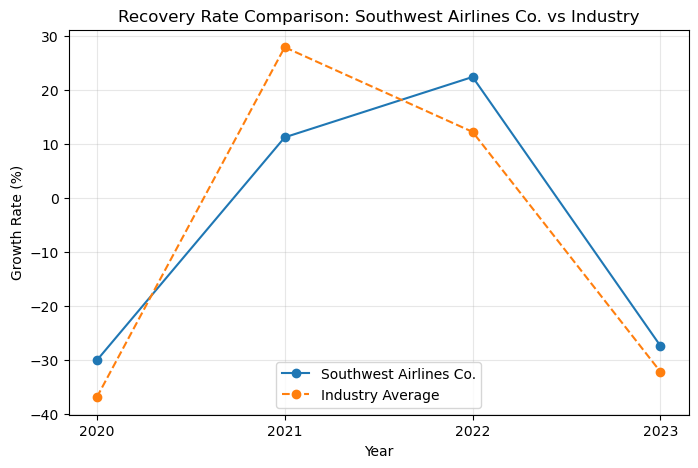

In [300]:
compare["YEAR"] = compare["YEAR"].astype(str)

plt.figure(figsize=(8,5))
plt.plot(compare["YEAR"], compare["Growth_Rate"], marker='o', label=f"{airline_top}")
plt.plot(compare["YEAR"], compare["Industry_Growth"], marker='o', linestyle='--', label="Industry Average")
plt.title(f"Recovery Rate Comparison: {airline_top} vs Industry")
plt.xlabel("Year")
plt.ylabel("Growth Rate (%)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

### Sân bay nào là điểm khởi hành / điểm đến phổ biến nhất?

In [301]:
flights_origin_yearly = df.groupby(["YEAR","ORIGIN","ORIGIN_CITY"])["FL_DATE"].count().reset_index(name="Total_Flights")

In [302]:
origin_top = (
    flights_origin_yearly.groupby("YEAR", group_keys=False)
    .apply(lambda x: x.nlargest(1, "Total_Flights"))
)
origin_top

,YEAR,ORIGIN,ORIGIN_CITY,Total_Flights
21,2019,ATL,"Atlanta, GA",27064
382,2020,ATL,"Atlanta, GA",17460
749,2021,ATL,"Atlanta, GA",21454
1119,2022,ATL,"Atlanta, GA",21624
1488,2023,ATL,"Atlanta, GA",15125


In [303]:
origin_least = (
    flights_origin_yearly.groupby("YEAR", group_keys=False)
    .apply(lambda x: x.nsmallest(1, "Total_Flights"))
)
origin_least

,YEAR,ORIGIN,ORIGIN_CITY,Total_Flights
13,2019,AKN,"King Salmon, AK",5
525,2020,HYA,"Hyannis, MA",1
764,2021,BIH,"Bishop, CA",1
1137,2022,BKG,"Branson, MO",1
1542,2023,COD,"Cody, WY",1


In [304]:
flights_dest_yearly = df.groupby(["YEAR","DEST","DEST_CITY"])["FL_DATE"].count().reset_index(name="Total_Flights")

In [305]:
dest_top = (
    flights_dest_yearly.groupby("YEAR", group_keys=False)
    .apply(lambda x: x.nlargest(1, "Total_Flights"))
)
dest_top

,YEAR,DEST,DEST_CITY,Total_Flights
21,2019,ATL,"Atlanta, GA",26891
382,2020,ATL,"Atlanta, GA",17342
750,2021,ATL,"Atlanta, GA",21293
1120,2022,ATL,"Atlanta, GA",21594
1487,2023,ATL,"Atlanta, GA",15276


In [306]:
dest_least = (
    flights_dest_yearly.groupby("YEAR", group_keys=False)
    .apply(lambda x: x.nsmallest(1, "Total_Flights"))
)
dest_least

,YEAR,DEST,DEST_CITY,Total_Flights
13,2019,AKN,"King Salmon, AK",2
715,2020,UIN,"Quincy, IL",1
765,2021,BIH,"Bishop, CA",2
1343,2022,OGD,"Ogden, UT",2
1541,2023,COD,"Cody, WY",1


## 1.2 Delay tổng quát
### Tỉ lệ chuyến bay bị delay (>15 phút) là bao nhiêu?

In [307]:
# tỉ lệ delay theo năm - tháng
delay_rate_yearly = (df.groupby(["YEAR","MONTH"])["ARR_DELAY"]
        .apply(lambda x: (x > 15).mean() * 100).round(1)
        .reset_index(name="Delay_Rate")
)

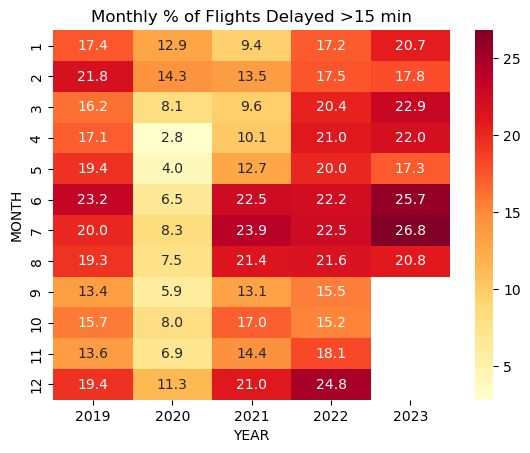

In [308]:
monthly_pivot = delay_rate_yearly.pivot(index="MONTH", 
                                          columns="YEAR", 
                                          values="Delay_Rate")
sns.heatmap(monthly_pivot, annot=True, fmt=".1f", cmap="YlOrRd")
plt.title("Monthly % of Flights Delayed >15 min")
plt.show()

### Thời gian delay trung bình là bao nhiêu phút?

In [309]:
flights_delayed = df.copy()
flights_delayed = df[df["DEP_DELAY"] >0]

In [310]:
delay_avg_yearly = flights_delayed.groupby(["YEAR"])["DEP_DELAY"].mean().reset_index(name = "Avg_Arrival_Delay").round(1)
delay_avg_yearly

,YEAR,Avg_Arrival_Delay
0,2019,40.6
1,2020,34.7
2,2021,37.5
3,2022,39.4
4,2023,42.9


### Phân phối độ trễ (histogram): delay thường rơi vào khoảng bao nhiêu phút?

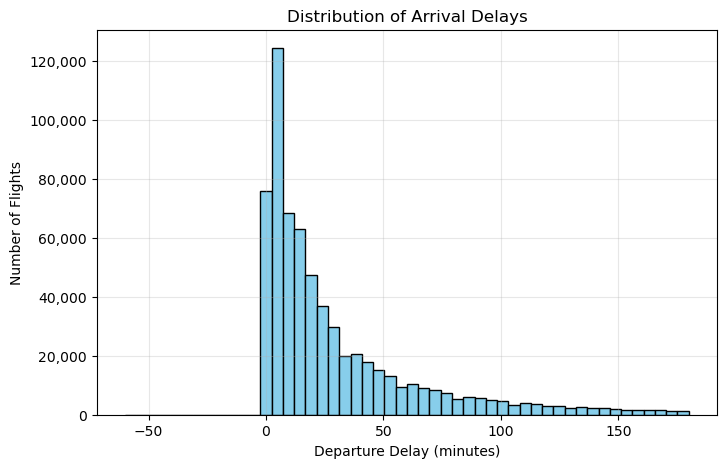

In [311]:
plt.figure(figsize=(8,5))
plt.hist(flights_delayed["DEP_DELAY"], bins=50, range=(-60, 180), 
         color="skyblue", edgecolor="black")

# define a custom formatter function
def thousands_formatter(x, p):
    return format(int(x), ',')

# Apply the formatter to the y-axis
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(thousands_formatter))

plt.title("Distribution of Arrival Delays")
plt.xlabel("Departure Delay (minutes)")
plt.ylabel("Number of Flights")
plt.grid(alpha=0.3)
plt.show()

### Bao nhiêu phần trăm chuyến bay bị hủy (CANCELLED = 1)?

In [312]:
flights_cancelled = df[df["CANCELLED"] == 1]

In [321]:
flights_cancel_yearly = flights_cancelled.groupby("YEAR")["AIRLINE"].count().reset_index(name = "Total_Cancelled_Flights")
flights_cancel_yearly

,YEAR,Total_Cancelled_Flights
0,2019,9067
1,2020,19238
2,2021,7074
3,2022,12133
4,2023,5010


In [322]:
flights_yearly

,YEAR,Total_Cancelled_Flights
0,2019,9067
1,2020,19238
2,2021,7074
3,2022,12133
4,2023,5010


In [329]:
# Tỉ lệ chuyến bay bị hủy hàng năm
flights_cancel_yearly = flights_cancelled.groupby("YEAR")["AIRLINE"].count().reset_index(name = "Total_Cancelled_Flights")
df_cancel_merge = flights_cancel_yearly.merge(flights_yearly, on = "YEAR")
df_cancel_merge["Cancelled_Rate"] = (df_cancel_merge["Total_Cancelled_Flights"] / df_cancel_merge["Total_Flights"] * 100).round(1)
df_cancel_merge

,YEAR,Total_Cancelled_Flights,Total_Flights,Cancelled_Rate
0,2019,9067,505345,1.8
1,2020,19238,318768,6.0
2,2021,7074,407824,1.7
3,2022,12133,457760,2.7
4,2023,5010,310303,1.6


### Tỉ lệ chuyến bị diverted (DIVERTED = 1)?

In [330]:
flights_diverted = df[df["DIVERTED"] == 1]

In [331]:
# Tỉ lệ chuyến bay bị hủy hàng năm
divert_rate_yearly = flights_diverted.groupby("YEAR")["AIRLINE"].count().reset_index(name = "Total_Diverted_Flights")
divert_airline_vs_total = divert_rate_yearly.merge(flights_yearly, on = "YEAR")
divert_airline_vs_total["Diverted_Rate"] = (divert_airline_vs_total["Total_Diverted_Flights"] / divert_airline_vs_total["Total_Flights"] * 100).round(1)
divert_airline_vs_total

,YEAR,Total_Diverted_Flights,Total_Flights,Diverted_Rate
0,2019,1262,505345,0.2
1,2020,548,318768,0.2
2,2021,991,407824,0.2
3,2022,1073,457760,0.2
4,2023,835,310303,0.3


In [332]:
# Tỉ lệ chuyến bay bị hủy theo tháng hàng năm
divert_rate_monthly = flights_diverted.groupby(["YEAR","MONTH"])["AIRLINE"].count().reset_index(name = "Total_Diverted_Flights")
divert_airline_vs_total = divert_rate_monthly.merge(flights_monthly, 
                                                 on = ["YEAR", "MONTH"], 
                                                 how="inner")
divert_airline_vs_total["Diverted_Rate"] = (divert_airline_vs_total["Total_Diverted_Flights"] / divert_airline_vs_total["Total_Flights"] * 100).round(1)
divert_airline_vs_total

,YEAR,MONTH,Total_Diverted_Flights,Total_Flights,Diverted_Rate
0,2019,1,88,39568,0.2
1,2019,2,96,35912,0.3
2,2019,3,62,43208,0.1
3,2019,4,113,41136,0.3
4,2019,5,137,43293,0.3
5,2019,6,171,43584,0.4
6,2019,7,157,44850,0.4
7,2019,8,126,45015,0.3
8,2019,9,86,41281,0.2
9,2019,10,79,43438,0.2


## 1.3 Theo thời gian
### Tỉ lệ delay theo tháng (hoặc quý) thay đổi ra sao?

In [333]:
flights_delayed.loc[:,"QUARTER"] = ((flights_delayed["MONTH"]-1)//3)+1

In [334]:
# tỉ lệ delay theo tháng
delay_rate_monthly = flights_delayed.groupby(["YEAR","MONTH"])["AIRLINE"].count().reset_index(name = "Total_Delayed_Flights")
delay_rate_monthly

,YEAR,MONTH,Total_Delayed_Flights
0,2019,1,12674
1,2019,2,13305
2,2019,3,14142
3,2019,4,13433
4,2019,5,15443
5,2019,6,17581
6,2019,7,16604
7,2019,8,15804
8,2019,9,11101
9,2019,10,13389


In [335]:
# Tỉ lệ chuyến bay bị hủy theo quý hàng năm
delay_rate_quarterly = flights_delayed.groupby(["YEAR","QUARTER"])["AIRLINE"].count().reset_index(name = "Total_Delayed_Flights")
delay_rate_quarterly

,YEAR,QUARTER,Total_Delayed_Flights
0,2019,1,40121
1,2019,2,46457
2,2019,3,43509
3,2019,4,41763
4,2020,1,28985
5,2020,2,5031
6,2020,3,10734
7,2020,4,12952
8,2021,1,16354
9,2021,2,33162


### Tỉ lệ delay trung bình theo ngày trong tuần (Monday–Sunday).

In [336]:
flights_delayed.loc[:,"DAY_OF_WEEK"] = flights_delayed["FL_DATE"].dt.dayofweek.map({0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday',
                                                     4: 'Friday', 5: 'Saturday', 6: 'Sunday'}).astype(dow_category)

In [337]:
delay_rate_weekday = flights_delayed.groupby(["YEAR","DAY_OF_WEEK"])["DEP_DELAY"].mean().reset_index(name = "Avg_Delayed_Flights").round(1)
delay_rate_weekday

,YEAR,DAY_OF_WEEK,Avg_Delayed_Flights
0,2019,Monday,42.0
1,2019,Tuesday,38.8
2,2019,Wednesday,39.5
3,2019,Thursday,41.3
4,2019,Friday,39.7
5,2019,Saturday,40.8
6,2019,Sunday,41.8
7,2020,Monday,34.3
8,2020,Tuesday,33.2
9,2020,Wednesday,33.8


### Delay trung bình theo giờ khởi hành (CRS_DEP_TIME) — giờ cao điểm có nhiều delay hơn không?

In [338]:
flights_delayed.loc[:,"DEP_HOUR"] = (flights_delayed["CRS_DEP_TIME"] // 100).astype(int)

delay_avg_hourly = (
    flights_delayed.groupby("DEP_HOUR")["DEP_DELAY"]
    .mean().reset_index(name = "Avg_Departure_Delay").round(1)
)
delay_avg_hourly

,DEP_HOUR,Avg_Departure_Delay
0,0,35.7
1,1,48.3
2,2,46.8
3,3,47.3
4,4,39.5
5,5,39.6
6,6,40.9
7,7,38.8
8,8,34.4
9,9,32.8


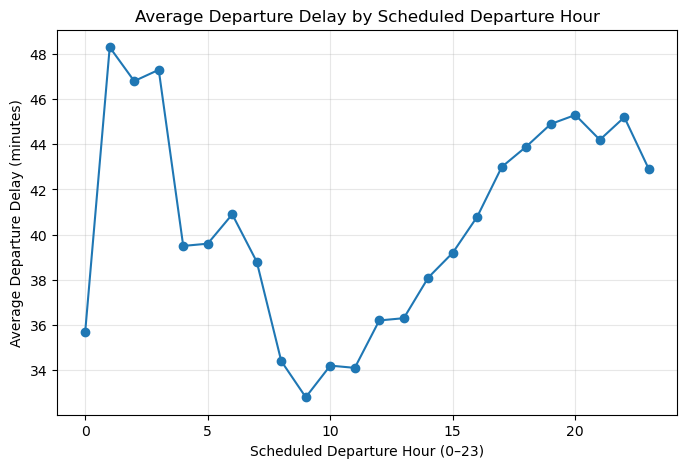

In [339]:
plt.figure(figsize=(8,5))
plt.plot(delay_avg_hourly["DEP_HOUR"], 
         delay_avg_hourly["Avg_Departure_Delay"], 
         marker="o")
plt.title("Average Departure Delay by Scheduled Departure Hour")
plt.xlabel("Scheduled Departure Hour (0–23)")
plt.ylabel("Average Departure Delay (minutes)")
plt.grid(True, alpha=0.3)
plt.show()

### Có xu hướng delay tăng vào mùa đông hoặc mùa mưa không?

In [340]:
def get_season(month):
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    else:
        return "Fall"

flights_delayed["SEASON"] = flights_delayed["MONTH"].apply(get_season)

In [341]:
delay_avg_seasonal = flights_delayed.groupby(["YEAR","SEASON"])["DEP_DELAY"].mean().reset_index(name = "Avg_Delayed_Flights").round(1)
delay_avg_seasonal

,YEAR,SEASON,Avg_Delayed_Flights
0,2019,Fall,35.8
1,2019,Spring,40.3
2,2019,Summer,44.2
3,2019,Winter,40.7
4,2020,Fall,31.7
5,2020,Spring,35.5
6,2020,Summer,32.1
7,2020,Winter,36.6
8,2021,Fall,33.5
9,2021,Spring,33.6


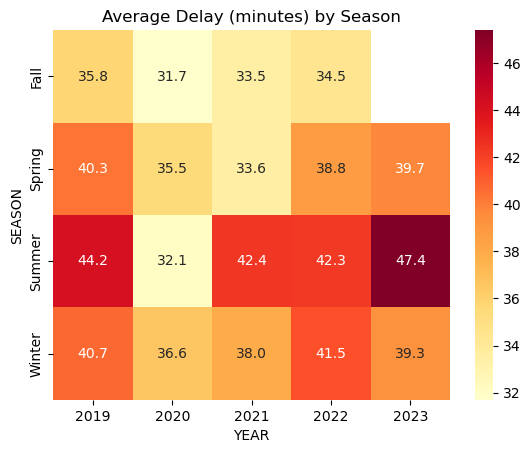

In [342]:
season_pivot = delay_avg_seasonal.pivot(index="SEASON", 
                                          columns="YEAR", 
                                          values="Avg_Delayed_Flights")
sns.heatmap(season_pivot, annot=True, fmt=".1f", cmap="YlOrRd")
plt.title("Average Delay (minutes) by Season")
plt.show()

## 1.4 Theo hãng và sân bay
### Hãng hàng không nào có delay trung bình cao nhất / thấp nhất?

In [343]:
delay_airline = (
    flights_delayed.groupby(["YEAR", "AIRLINE"])["ARR_DELAY"]
        .mean().reset_index(name = "Delay_Rate").round(1)
        .sort_values("Delay_Rate", ascending=False)
)

airline_delay_top = (
    delay_airline.groupby("YEAR", group_keys=False)
    .apply(lambda x: x.nlargest(1, "Delay_Rate"))
)

airline_delay_least = (
    delay_airline.groupby("YEAR", group_keys=False)
    .apply(lambda x: x.nsmallest(1, "Delay_Rate"))
)

In [344]:
airline_delay_top

,YEAR,AIRLINE,Delay_Rate
6,2019,ExpressJet Airlines LLC d/b/a aha!,70.8
18,2020,Allegiant Air,46.4
44,2021,Mesa Airlines Inc.,52.5
61,2022,Mesa Airlines Inc.,53.1
69,2023,Allegiant Air,59.7


In [345]:
airline_delay_least

,YEAR,AIRLINE,Delay_Rate
8,2019,Hawaiian Airlines Inc.,15.1
31,2020,Southwest Airlines Co.,9.1
41,2021,Hawaiian Airlines Inc.,13.1
65,2022,Southwest Airlines Co.,21.1
80,2023,Southwest Airlines Co.,22.3


### Hãng nào có tỉ lệ hủy cao nhất?

In [346]:
# Tỉ lệ chuyến bay bị hủy hàng năm
cancel_rate_yearly = flights_cancelled.groupby("YEAR")["AIRLINE"].count().reset_index(name = "Total_Cancelled_Flights")
df_cancel_merge = cancel_rate_yearly.merge(flights_yearly, on = "YEAR")
df_cancel_merge["Cancelled_Rate"] = (df_cancel_merge["Total_Cancelled_Flights"] / df_cancel_merge["Total_Flights"] * 100).round(1)
df_cancel_merge

,YEAR,Total_Cancelled_Flights,Total_Flights,Cancelled_Rate
0,2019,9067,505345,1.8
1,2020,19238,318768,6.0
2,2021,7074,407824,1.7
3,2022,12133,457760,2.7
4,2023,5010,310303,1.6


In [347]:
cancel_rate_airline = (
    flights_cancelled.groupby(["YEAR", "AIRLINE"])["FL_DATE"].count()
        .reset_index(name = "Cancelled_Flights")
        #.sort_values("Cancelled_Rate", ascending=True)
)

cancel_airline_vs_total = cancel_rate_airline.merge(flights_airline_yearly, 
                                                 on = ["YEAR", "AIRLINE"], 
                                                 how="inner")

cancel_airline_vs_total["Cancelled_Rate"] = cancel_airline_vs_total["Cancelled_Flights"] / cancel_airline_vs_total["Total_Flights"] * 100
cancel_airline_vs_total = cancel_airline_vs_total.reset_index(drop=True)

cancel_airline_vs_total = cancel_airline_vs_total.drop(columns=["level_0", "index"], errors="ignore")
cancel_airline_vs_total

,YEAR,AIRLINE,Cancelled_Flights,Total_Flights,Cancelled_Rate
0,2019,Alaska Airlines Inc.,220,17914,1.228090
1,2019,Allegiant Air,37,7124,0.519371
2,2019,American Airlines Inc.,1330,64590,2.059142
3,2019,Delta Air Lines Inc.,123,67743,0.181569
4,2019,Endeavor Air Inc.,304,17502,1.736944
...,...,...,...,...,...
78,2023,Republic Airline,442,13972,3.163470
79,2023,SkyWest Airlines Inc.,485,30288,1.601294
80,2023,Southwest Airlines Co.,829,64495,1.285371
81,2023,Spirit Air Lines,230,11930,1.927913


In [348]:
airline_cancel_top = (
    cancel_airline_vs_total.groupby("YEAR", group_keys=False)
    .apply(lambda x: x.nlargest(1, "Cancelled_Rate"))
)
airline_cancel_top

,YEAR,AIRLINE,Cancelled_Flights,Total_Flights,Cancelled_Rate
6,2019,ExpressJet Airlines LLC d/b/a aha!,413,9074,4.551466
18,2020,Allegiant Air,1008,6654,15.148783
35,2021,Allegiant Air,263,7975,3.297806
63,2022,Republic Airline,947,21334,4.438924
78,2023,Republic Airline,442,13972,3.163470


In [349]:
airline_cancel_least = (
    cancel_airline_vs_total.groupby("YEAR", group_keys=False)
    .apply(lambda x: x.nsmallest(1, "Cancelled_Rate"))
)
airline_cancel_least

,YEAR,AIRLINE,Cancelled_Flights,Total_Flights,Cancelled_Rate
8,2019,Hawaiian Airlines Inc.,8,5736,0.139470
32,2020,Spirit Air Lines,205,8997,2.278537
41,2021,Hawaiian Airlines Inc.,17,4078,0.416871
58,2022,Hawaiian Airlines Inc.,41,5070,0.808679
69,2023,Allegiant Air,43,5523,0.778562


### Sân bay nào có delay lớn nhất (tính theo ORIGIN)?

In [350]:
delay_origin = (
    flights_delayed.groupby(["YEAR", "ORIGIN","ORIGIN_CITY"])["DEP_DELAY"]
        .mean().reset_index(name = "Delay_Rate").round(1)
        .sort_values("Delay_Rate", ascending=False)
)

origin_delay_top = (
    delay_origin.groupby("YEAR", group_keys=False)
    .apply(lambda x: x.nlargest(1, "Delay_Rate"))
)

origin_delay_least = (
    delay_origin.groupby("YEAR", group_keys=False)
    .apply(lambda x: x.nsmallest(1, "Delay_Rate"))
)

In [351]:
origin_delay_top

,YEAR,ORIGIN,ORIGIN_CITY,Delay_Rate
3,2019,ABR,"Aberdeen, SD",231.0
375,2020,ALS,"Alamosa, CO",374.0
772,2021,BTM,"Butte, MT",530.5
1215,2022,FOD,"Fort Dodge, IA",561.8
1756,2023,SMX,"Santa Maria, CA",537.7


In [352]:
origin_delay_least

,YEAR,ORIGIN,ORIGIN_CITY,Delay_Rate
243,2019,OME,"Nome, AK",10.6
628,2020,PPG,"Pago Pago, TT",3.0
883,2021,HVN,"New Haven, CT",4.0
1332,2022,OGS,"Ogdensburg, NY",7.3
1623,2023,JMS,"Jamestown, ND",1.0


### Sân bay nào thường xuyên gặp TAXI_OUT hoặc TAXI_IN dài nhất?

In [353]:
taxiout_origin = (
    df.groupby(["YEAR", "ORIGIN","ORIGIN_CITY"])["TAXI_OUT"]
        .mean().reset_index(name = "Avg_Out_Time").round(1)
        .sort_values("Avg_Out_Time", ascending=False)
)

origin_taxiout_top = (
    taxiout_origin.groupby("YEAR", group_keys=False)
    .apply(lambda x: x.nlargest(1, "Avg_Out_Time"))
)

origin_taxiout_least = (
    taxiout_origin.groupby("YEAR", group_keys=False)
    .apply(lambda x: x.nsmallest(1, "Avg_Out_Time"))
)

In [354]:
origin_taxiout_top

,YEAR,ORIGIN,ORIGIN_CITY,Avg_Out_Time
197,2019,LGA,"New York, NY",27.0
512,2020,HDN,"Hayden, CO",22.8
827,2021,DIK,"Dickinson, ND",29.5
1195,2022,DIK,"Dickinson, ND",28.3
1574,2023,ERI,"Erie, PA",28.7


In [355]:
origin_taxiout_least

,YEAR,ORIGIN,ORIGIN_CITY,Avg_Out_Time
321,2019,SMX,"Santa Maria, CA",6.0
525,2020,HYA,"Hyannis, MA",4.0
986,2021,OWB,"Owensboro, KY",5.3
1465,2022,YKM,"Yakima, WA",6.2
1710,2023,OWB,"Owensboro, KY",7.0
